In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from RiboGraphViz import RGV
import sys
import matplotlib.pyplot as plt
import pandas as pd
from DegScore import DegScore
sys.path.append('/Users/hwayment/das/github/OpenVaccine-solves/scripts/')
import plot_utils 

Populating the interactive namespace from numpy and matplotlib


In [35]:
df = pd.read_csv('superfolders_18Aug2021_WITH_METRICS.csv')

In [42]:
df.MainPlot.unique()

array([0, 1])

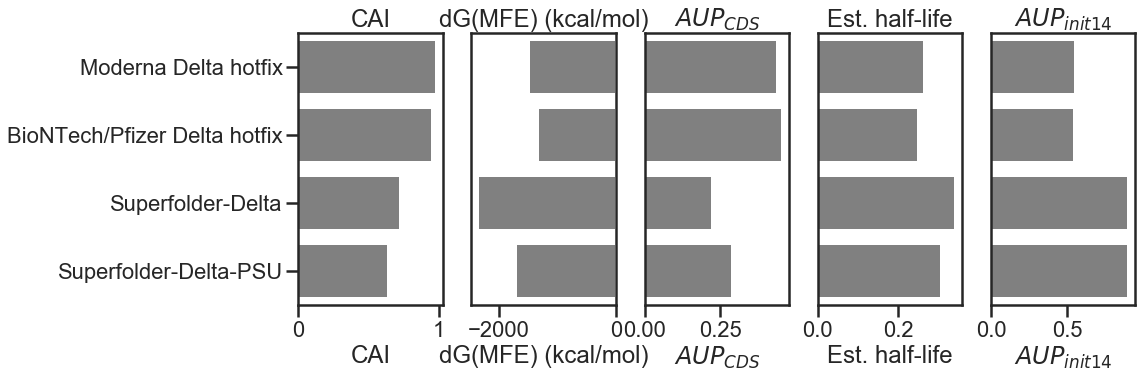

In [45]:
subset_df = df.loc[df['MainPlot']==1]
subset_df = subset_df.iloc[::-1]

sns.set_context('poster')
figure(figsize=(15,5))

metrics = ['CAI', 'dG(MFE)', 'AUP', 'DegScore_half_life', 'AUP init 14']

metric_labels = ['CAI', 'dG(MFE) (kcal/mol)',r'$AUP_{CDS}$', 'Est. half-life', r'$AUP_{init 14}$']

labels=['Moderna Delta hotfix',
       'BioNTech/Pfizer Delta hotfix',
       "Superfolder-Delta",
       "Superfolder-Delta-PSU"]

for i, metric in enumerate(metrics):
    subplot(1,5,i+1)
    sns.barplot(y='Designer',x=metric,data=subset_df, dodge=False, color='grey')
    title(metric_labels[i])
    xlabel(metric_labels[i])
    legend([],frameon=False)
    if metric=='AUP_init':
        xlim([0,1])
    if i!=0:
        yticks([])
    else:
        yticks(range(4), labels)
    ylabel('')
    
savefig('Delta_update_metrics.png',dpi=300, bbox_inches='tight')

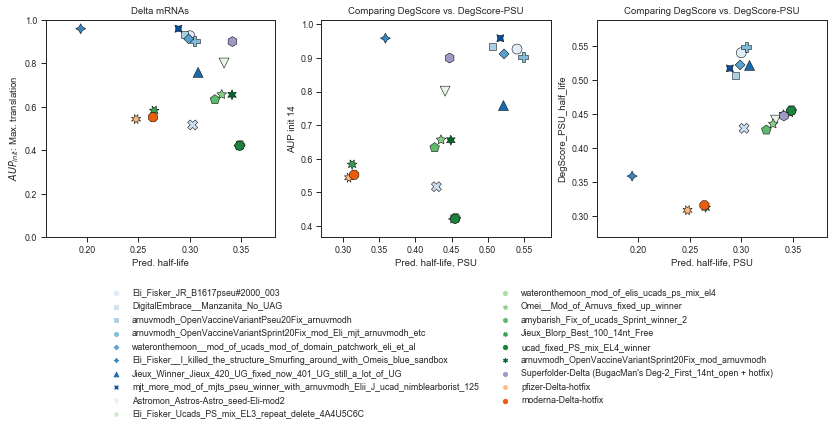

In [29]:
figure(figsize=(14,4))

nrows, ncols=1,3
subplot(nrows, ncols, 1)
title('Delta mRNAs')

palette = sns.color_palette('Blues',8) + sns.color_palette('Greens',8) + sns.color_palette('Purples',1) + sns.color_palette('Oranges',2) 

sns.scatterplot(x='DegScore_half_life', y='AUP init 14', data=df, style='Designer', hue='Designer',  palette=palette, #.loc[df.Source.isin(kinds)],
     linewidth=0.5, edgecolor='k',s=100)
ylim([0,1])
legend([],frameon=False)
xlabel(r'Pred. half-life')
ylabel(r'$AUP_{init}$: Max. translation')

subplot(nrows, ncols, 2)

title('Comparing DegScore vs. DegScore-PSU')

sns.scatterplot(x='DegScore_PSU_half_life', y='AUP init 14', data=df,
     hue='Designer', style='Designer', palette=palette, linewidth=0.5, edgecolor='k',s=100)
xlabel(r'Pred. half-life')
xlabel(r'Pred. half-life, PSU')
legend(bbox_to_anchor=(2,-0.2),frameon=False,ncol=2)

subplot(nrows, ncols, 3)

title('Comparing DegScore vs. DegScore-PSU')

sns.scatterplot(x='DegScore_half_life', y='DegScore_PSU_half_life', data=df,
                    hue='Designer', style='Designer', palette=palette, linewidth=0.5, edgecolor='k',s=100)
xlabel(r'Pred. half-life')
xlabel(r'Pred. half-life, PSU')
legend([],frameon=False)


#tight_layout()

savefig('Delta_results_18Aug2021.png',dpi=300, bbox_inches='tight')
savefig('Delta_results_18Aug2021.pdf', bbox_inches='tight')